In [2]:
import numpy as np
import pandas as pd 
import scipy as sp
import scipy.io
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import os
import glob
import fnmatch
import re
import argparse

import sys, getopt

In [3]:
df_cal_ch3_clean_1 = pd.read_csv("./calib_ch3_csvfiles/calib15june-ch3_0-300files.csv")
df_cal_ch3_clean_1.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,100003,100004,Saturated,Pedestal,n pe,pe height,pe width,pe area,spe 1sig,spe 2sig
0,0,e,/pro,2020-06-15 11:39:51.612,NaN,NaN,NaN,NaN,NaN,NaN,...,3840,3840,False,4440.120603,0.0,0.000000,0.000000,0.000000e+00,False,False
1,1,e,/pro,2020-06-15 11:39:51.643,NaN,NaN,NaN,NaN,NaN,NaN,...,4096,3840,False,4278.802010,1.0,2641.389990,3278.375000,6.937773e+06,True,True
2,2,e,/pro,2020-06-15 11:39:51.685,NaN,NaN,NaN,NaN,NaN,NaN,...,4608,4608,False,4264.393970,1.0,2804.278030,1643.166667,3.506771e+06,True,True
3,3,e,/pro,2020-06-15 11:39:51.711,NaN,NaN,NaN,NaN,NaN,NaN,...,4608,4864,False,4388.020101,1.0,3173.195899,1431.009615,3.503061e+06,True,False
4,4,e,/pro,2020-06-15 11:39:51.744,NaN,NaN,NaN,NaN,NaN,NaN,...,3584,4352,False,4379.015075,0.0,0.000000,0.000000,0.000000e+00,False,False


In [6]:
df_cal_ch3_clean_1.shape

(300, 100014)

In [7]:
print('full 1st dataset:', df_cal_ch3_clean_1.shape)
print('n pe > 0:', df_cal_ch3_clean_1.loc[df_cal_ch3_clean_1['n pe']>0].shape)
print('spe 1sig ==True:', df_cal_ch3_clean_1.loc[df_cal_ch3_clean_1['spe 1sig']==True].shape)

full 1st dataset: (300, 100014)
n pe > 0: (219, 100014)
spe 1sig ==True: (215, 100014)


In [14]:
df_cal_ch3_clean_2 = pd.read_csv("./calib_ch3_csvfiles/calib15june-ch3_301-600files.csv")
df_cal_ch3_clean_2.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,100003,100004,Saturated,Pedestal,n pe,pe height,pe width,pe area,spe 1sig,spe 2sig
0,0,e,/pro,2020-06-15 11:40:07.603273442,NaN,NaN,NaN,NaN,NaN,NaN,...,3328,3328,False,4305.045226,1.0,3042.154774,2960.000000,7.191616e+06,True,True
1,1,e,/pro,2020-06-15 11:40:07.656439976,NaN,NaN,NaN,NaN,NaN,NaN,...,4864,4864,False,4338.749749,1.0,2074.562251,2468.900000,3.692852e+06,True,True
2,2,e,/pro,2020-06-15 11:40:07.716733952,NaN,NaN,NaN,NaN,NaN,NaN,...,3584,3840,False,4325.756784,1.0,3136.131216,3566.464286,8.175701e+06,True,True
3,3,e,/pro,2020-06-15 11:40:07.746811518,NaN,NaN,NaN,NaN,NaN,NaN,...,3840,3840,False,4136.779899,1.0,2554.036101,1637.812500,3.035605e+06,True,True
4,4,e,/pro,2020-06-15 11:40:07.951710185,NaN,NaN,NaN,NaN,NaN,NaN,...,4608,4608,False,4417.350754,1.0,4419.769246,2185.750000,7.133851e+06,True,False


In [15]:
df_cal_ch3_clean_2.shape

(299, 100014)

In [16]:
print('full 1st dataset:', df_cal_ch3_clean_2.shape)
print('n pe > 0:', df_cal_ch3_clean_2.loc[df_cal_ch3_clean_2['n pe']>0].shape)
print('spe 1sig ==True:', df_cal_ch3_clean_2.loc[df_cal_ch3_clean_2['spe 1sig']==True].shape)

full 1st dataset: (299, 100014)
n pe > 0: (213, 100014)
spe 1sig ==True: (211, 100014)


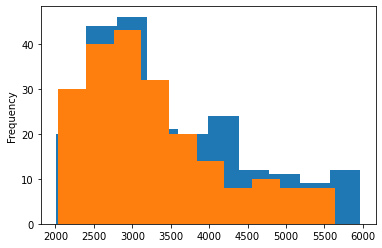

In [17]:
df_cal_ch3_clean_1.loc[(df_cal_ch3_clean_1['pe height']>0)]['pe height'].plot(kind='hist', label='sample clean 1')
df_cal_ch3_clean_2.loc[(df_cal_ch3_clean_2['pe height']>0)]['pe height'].plot(kind='hist', label='sample clean 2')


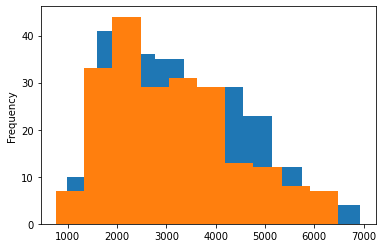

In [18]:
df_cal_ch3_clean_1.loc[(df_cal_ch3_clean_1['pe height']>0)]['pe width'].plot(kind='hist', label='sample clean 1')
df_cal_ch3_clean_2.loc[(df_cal_ch3_clean_2['pe height']>0)]['pe width'].plot(kind='hist', label='sample clean 2 ')

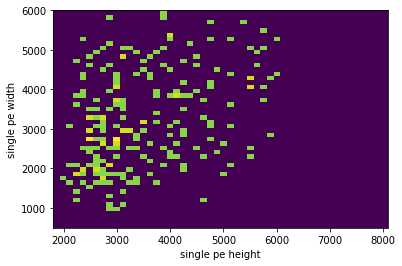

In [13]:
plt.hist2d(df_cal_ch3_clean_1['pe height'], df_cal_ch3_clean_1['pe width'], 
           [50,50], range=[[1800,8100],[500,6000]],
           cmap='viridis',
           norm=mcolors.PowerNorm(0.18))
plt.xlabel('single pe height')
plt.ylabel('single pe width')

plt.show()

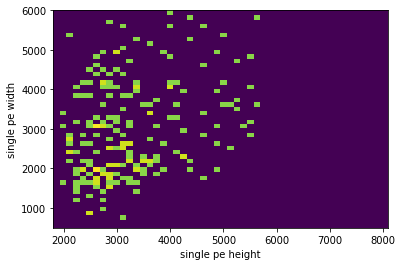

In [19]:
plt.hist2d(df_cal_ch3_clean_2['pe height'], df_cal_ch3_clean_2['pe width'], 
           [50,50], range=[[1800,8100],[500,6000]],
           cmap='viridis',
           norm=mcolors.PowerNorm(0.18))
plt.xlabel('single pe height')
plt.ylabel('single pe width')

plt.show()